In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import IPython.display as ipd
import random
  
# load the metadata
metadata_df = pd.read_csv("metadata.csv")

# load the annotations
annotations_df = pd.read_csv("annotations.csv")
annotations_embeddings = np.load("annotations_text_embeddings.npz")["embeddings"]
  
# load audio features
feature_filename = metadata_df.loc[0, "filename"].replace("mp3", "npz")
features = np.load(os.path.join("audio_features", feature_filename))
print(list(features.keys()))
print("Shape of ZCR feature (time, n_features)", features["zerocrossingrate"].shape)
print("Shape of MFCC features (time, n_features)", features["mfcc"].shape)
  
# load audio (optional, just i you want to compute your own features ...)
import librosa
waveform, sr = librosa.load(os.path.join("audio", metadata_df.loc[0, "filename"]), sr=16000)

# load labels
filename = os.path.join("labels", "14_labels.npz")
labels = np.load(filename)
print("Classes:", list(labels.keys()))
print("Bird Chirp Labels:", labels["Bird Chirp"].mean(-1))

['embeddings', 'melspectrogram', 'mfcc', 'mfcc_delta', 'mfcc_delta2', 'flatness', 'centroid', 'flux', 'energy', 'power', 'bandwidth', 'contrast', 'zerocrossingrate']
Shape of ZCR feature (time, n_features) (184, 1)
Shape of MFCC features (time, n_features) (184, 32)
Classes: ['Airplane', 'Alarm', 'Beep/Bleep', 'Bell', 'Bicycle', 'Bird Chirp', 'Bus', 'Car', 'Cat Meow', 'Chainsaw', 'Clapping', 'Cough', 'Cow Moo', 'Cowbell', 'Crying', 'Dog Bark', 'Doorbell', 'Drip', 'Drums', 'Fire', 'Footsteps', 'Guitar', 'Hammer', 'Helicopter', 'Hiccup', 'Horn Honk', 'Horse Neigh', 'Insect Buzz', 'Jackhammer', 'Laughter', 'Lawn Mower', 'Motorcycle', 'Piano', 'Pig Oink', 'Power Drill', 'Power Saw', 'Rain', 'Rooster Crow', 'Saxophone', 'Sewing Machine', 'Sheep/Goat Bleat', 'Ship/Boat', 'Shout', 'Singing', 'Siren', 'Sneeze', 'Snoring', 'Speech', 'Stream/River', 'Thunder', 'Train', 'Truck', 'Trumpet', 'Vacuum Cleaner', 'Violin', 'Washing Machine', 'Waves', 'Wind']
Bird Chirp Labels: [0. 0. 0. 0. 0. 0. 0. 0. 

In [2]:
# choose audio 14
filename = metadata_df.loc[0, "filename"]
waveform, sr = librosa.load(os.path.join("audio", filename), sr=16000)

In [3]:
# check the free text annot. for audio 14
clip_annotations = annotations_df[annotations_df["filename"] == filename]
display(clip_annotations[["onset", "offset", "text"]])

,onset,offset,text
16550,0.038424,21.978526,People are speaking.


In [4]:
filename = os.path.join("labels", "789155_labels.npz")
labels = np.load(filename)
print("Classes:", list(labels.keys()))
print("Rain:", labels["Rain"].mean(-1))

Classes: ['Airplane', 'Alarm', 'Beep/Bleep', 'Bell', 'Bicycle', 'Bird Chirp', 'Bus', 'Car', 'Cat Meow', 'Chainsaw', 'Clapping', 'Cough', 'Cow Moo', 'Cowbell', 'Crying', 'Dog Bark', 'Doorbell', 'Drip', 'Drums', 'Fire', 'Footsteps', 'Guitar', 'Hammer', 'Helicopter', 'Hiccup', 'Horn Honk', 'Horse Neigh', 'Insect Buzz', 'Jackhammer', 'Laughter', 'Lawn Mower', 'Motorcycle', 'Piano', 'Pig Oink', 'Power Drill', 'Power Saw', 'Rain', 'Rooster Crow', 'Saxophone', 'Sewing Machine', 'Sheep/Goat Bleat', 'Ship/Boat', 'Shout', 'Singing', 'Siren', 'Sneeze', 'Snoring', 'Speech', 'Stream/River', 'Thunder', 'Train', 'Truck', 'Trumpet', 'Vacuum Cleaner', 'Violin', 'Washing Machine', 'Waves', 'Wind']
Rain: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

In [6]:
def viz_annot(audio_filename, label_name, metadata_df, annotations_df):
    audio_path = os.path.join("audio", audio_filename)
    waveform, sr = librosa.load(audio_path, sr=16000)
    time = np.linspace(0, len(waveform) / sr, num=len(waveform))
    label_filename = audio_filename.replace(".mp3", "_labels.npz")
    label_path = os.path.join("labels", label_filename)
    labels = np.load(label_path)
    label_activity = labels[label_name].mean(axis=-1)

    relevant_annotations = annotations_df[annotations_df['filename'] == audio_filename]

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time, waveform)
    plt.title(f"Waveform: {audio_filename}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 1, 2)
    plt.plot(np.linspace(0, len(label_activity) * (len(waveform) / sr) / len(label_activity), len(label_activity)), label_activity, label='Label Activity')
    plt.yticks([0, 1], ['Inactive', 'Active'])
    plt.ylabel(label_name)
    plt.xlabel("Time (s)")

    if 'onset' in relevant_annotations.columns and 'offset' in relevant_annotations.columns and 'annotation' in relevant_annotations.columns:
        for index, row in relevant_annotations.iterrows():
            start = row['onset']
            end = row['offset']
            annotation_text = row['annotation']
            plt.axvspan(start, end, color='red', alpha=0.2, label='Annotation Region' if index == 0 else "")
            plt.text((start + end) / 2, 0.8, annotation_text, ha='center', va='center', color='red')

    plt.tight_layout()
    plt.legend()
    plt.show()

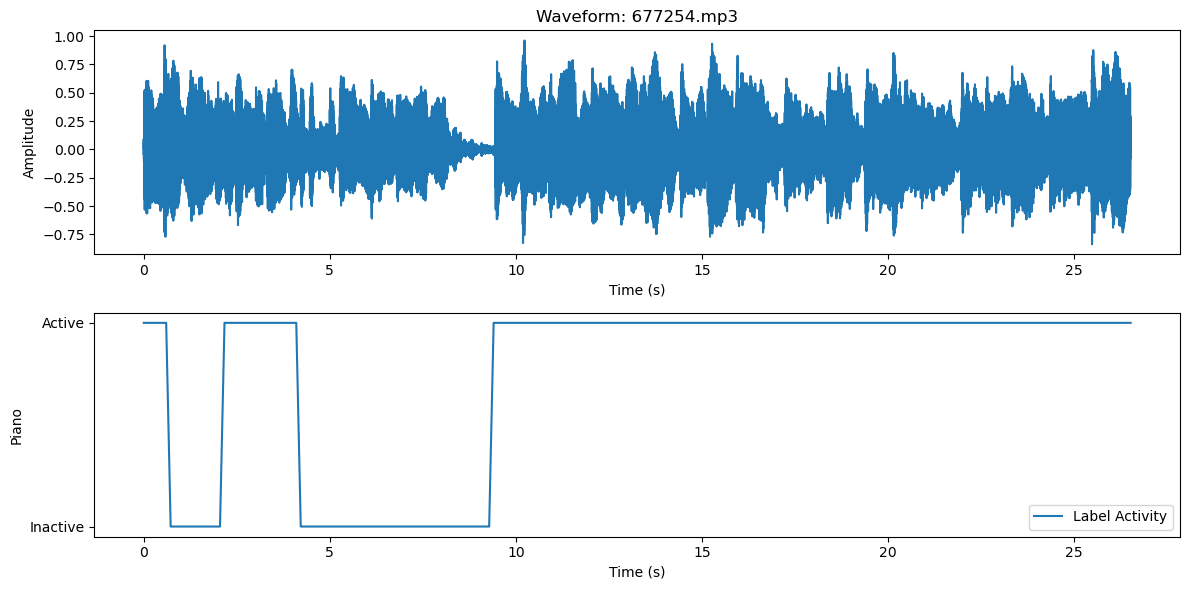

In [7]:
filename = metadata_df.loc[24, "filename"]
label_to_inspect = "Piano"
viz_annot(filename, label_to_inspect, metadata_df, annotations_df)
ipd.Audio(os.path.join("audio", filename))

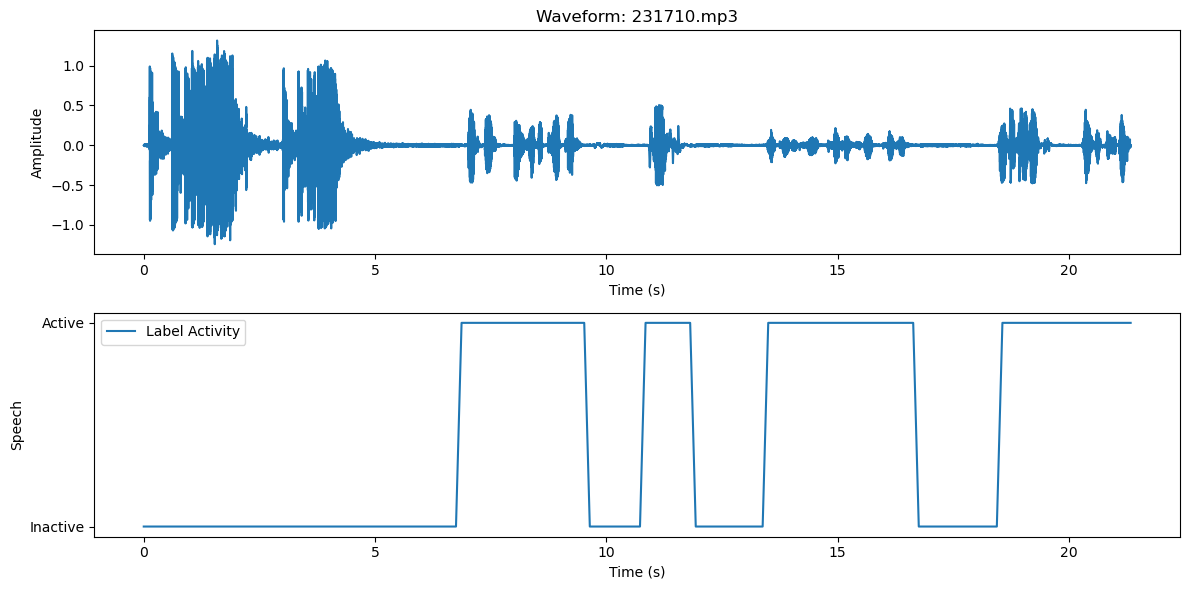

In [8]:
sample_filename = metadata_df.loc[17, "filename"]
label_to_inspect = "Speech"
viz_annot(sample_filename, label_to_inspect, metadata_df, annotations_df)
ipd.Audio(os.path.join("audio", sample_filename))

In [9]:
filename = os.path.join("labels", "677254_labels.npz")
labels = np.load(filename)
print("Classes:", list(labels.keys()))
print("Piano Labels:", labels["Piano"].mean(-1))

Classes: ['Airplane', 'Alarm', 'Beep/Bleep', 'Bell', 'Bicycle', 'Bird Chirp', 'Bus', 'Car', 'Cat Meow', 'Chainsaw', 'Clapping', 'Cough', 'Cow Moo', 'Cowbell', 'Crying', 'Dog Bark', 'Doorbell', 'Drip', 'Drums', 'Fire', 'Footsteps', 'Guitar', 'Hammer', 'Helicopter', 'Hiccup', 'Horn Honk', 'Horse Neigh', 'Insect Buzz', 'Jackhammer', 'Laughter', 'Lawn Mower', 'Motorcycle', 'Piano', 'Pig Oink', 'Power Drill', 'Power Saw', 'Rain', 'Rooster Crow', 'Saxophone', 'Sewing Machine', 'Sheep/Goat Bleat', 'Ship/Boat', 'Shout', 'Singing', 'Siren', 'Sneeze', 'Snoring', 'Speech', 'Stream/River', 'Thunder', 'Train', 'Truck', 'Trumpet', 'Vacuum Cleaner', 'Violin', 'Washing Machine', 'Waves', 'Wind']
Piano Labels: [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1

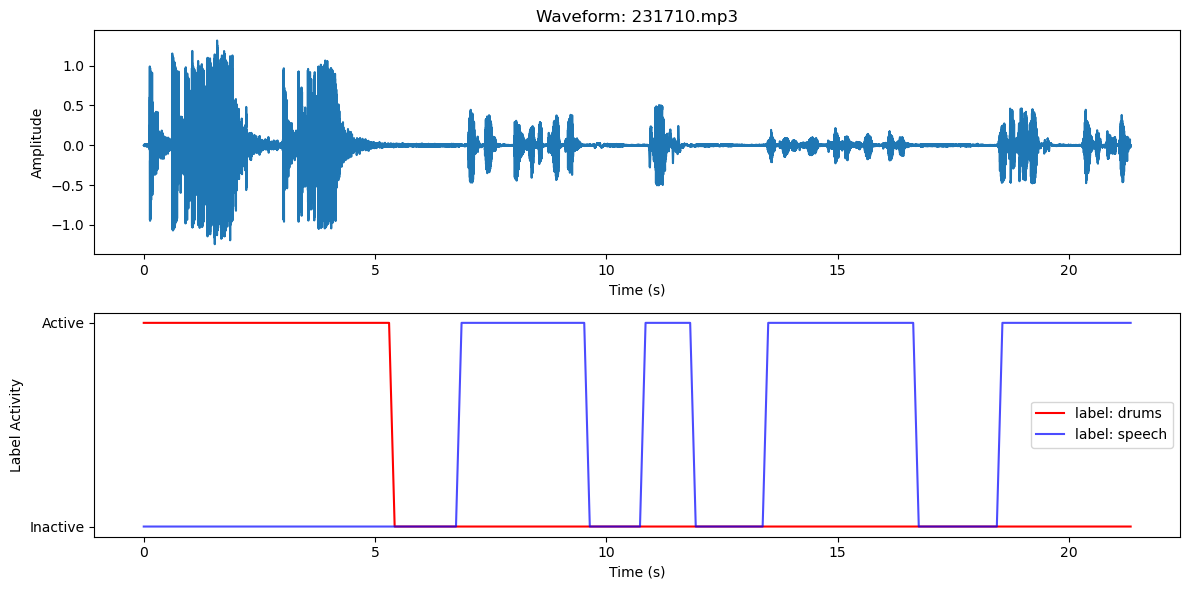

In [10]:
def viz_annot(audio_filename, label_name, metadata_df, annotations_df):
    audio_path = os.path.join("audio", audio_filename)
    waveform, sr = librosa.load(audio_path, sr=16000)
    time = np.linspace(0, len(waveform) / sr, num=len(waveform))

    label_filename = audio_filename.replace(".mp3", "_labels.npz")
    label_path = os.path.join("labels", label_filename)
    labels = np.load(label_path)
    label_activity = labels[label_name].mean(axis=-1)
    speech_activity = labels["Speech"].mean(axis=-1)
    relevant_annotations = annotations_df[annotations_df['filename'] == audio_filename]

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, waveform)
    plt.title(f"Waveform: {audio_filename}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.subplot(2, 1, 2)
    plt.plot(np.linspace(0, len(label_activity) * (len(waveform) / sr) / len(label_activity), len(label_activity)), label_activity, label='label: drums', color='red')
    plt.plot(np.linspace(0, len(speech_activity) * (len(waveform) / sr) / len(speech_activity), len(speech_activity)), speech_activity, label='label: speech', color='blue', alpha=0.7)

    plt.yticks([0, 1], ['Inactive', 'Active'])
    plt.ylabel("Label Activity")
    plt.xlabel("Time (s)")

    if 'onset' in relevant_annotations.columns and 'offset' in relevant_annotations.columns and 'annotation' in relevant_annotations.columns:
        for index, row in relevant_annotations.iterrows():
            start = row['onset']
            end = row['offset']
            annotation_text = row['annotation']
            plt.axvspan(start, end, color='red', alpha=0.2, label='Annotation Region' if index == 0 else "")
            plt.text((start + end) / 2, 0.8, annotation_text, ha='center', va='center', color='red')

    plt.tight_layout()
    plt.legend()
    plt.show()

filename = metadata_df.loc[17, "filename"]
label_to_inspect = "Drums"
viz_annot(filename, label_to_inspect, metadata_df, annotations_df)
ipd.Audio(os.path.join("audio", filename))
